Compaire **pretrained** models in Flowers data `102` class

the data is not huge for images ber class as its about  100 imgaes\class

- lets see how the model will accurate

In [ ]:
train_dir = '/content/drive/MyDrive/flower_data/train'  # Path to your train data
val_dir = '/content/drive/MyDrive/flower_data/valid'      # Path to your validation data
test_dir = '/content/drive/MyDrive/flower_data/test'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# ResNet50

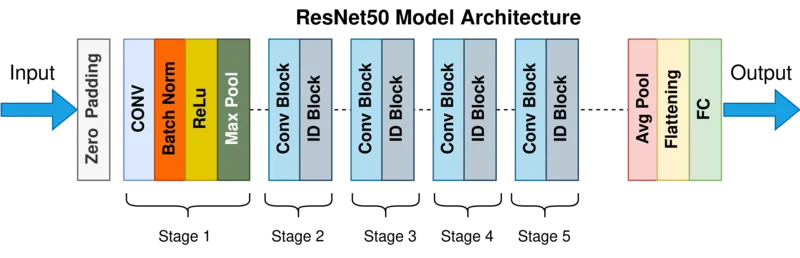

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet_preprocess
# Data generators
train_datagen = ImageDataGenerator(
    preprocessing_function=resnet_preprocess,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

val_generator = train_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)



Found 6552 images belonging to 102 classes.
Found 818 images belonging to 102 classes.


In [ ]:
# Model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(102, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])



## Fine Tuning

In [ ]:
# Fine-tune
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2)


# Example: Unfreeze the last 10 layers of ResNet50
for layer in base_model.layers[-10:]:
    layer.trainable = True

model.compile(optimizer=Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_generator, validation_data=val_generator, epochs=20,callbacks=[early_stopping, reduce_lr])

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


205/205 ━━━━━━━━━━━━━━━━━━━━ 2952s 14s/step - accuracy: 0.0155 - loss: 5.1919 - val_accuracy: 0.1076 - val_loss: 4.3430 - learning_rate: 1.0000e-05
Epoch 2/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 141s 591ms/step - accuracy: 0.0590 - loss: 4.4718 - val_accuracy: 0.2225 - val_loss: 3.8764 - learning_rate: 1.0000e-05
Epoch 3/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 131s 624ms/step - accuracy: 0.1453 - loss: 4.0276 - val_accuracy: 0.3399 - val_loss: 3.3809 - learning_rate: 1.0000e-05
Epoch 4/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 123s 585ms/step - accuracy: 0.2418 - loss: 3.5857 - val_accuracy: 0.4181 - val_loss: 2.9381 - learning_rate: 1.0000e-05
Epoch 5/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 142s 583ms/step - accuracy: 0.3305 - loss: 3.1772 - val_accuracy: 0.4780 - val_loss: 2.5282 - learning_rate: 1.0000e-05
Epoch 6/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 141s 583ms/step - accuracy: 0.4028 - loss: 2.8277 - val_accuracy: 0.5342 - val_loss: 2.2440 - learning_rate: 1.0000e-05
Epoch 7/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 143s 586ms/s

 accuracy: 0.8296 - Vs - val_accuracy: 0.8912

 it may take us to overfitting

In [ ]:
model.save('/content/drive/MyDrive/flower_data/Resnet50.keras')

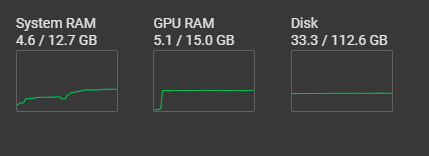

# EfficientNetB0

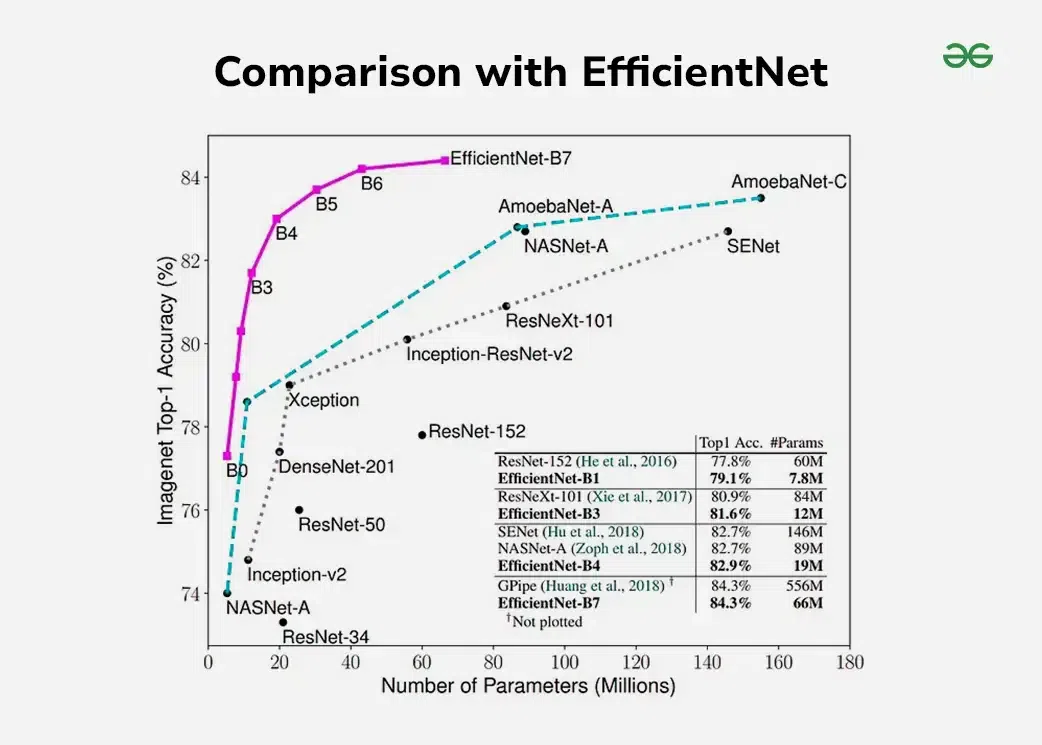

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping


# Image dimensions and batch size
img_size = (224, 224)
batch_size = 32

# Data generators with preprocessing
train_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input,  # EfficientNet preprocessing
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input
)


train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)



# Load EfficientNet-B0 with pre-trained weights
base_model = EfficientNetB0(
    weights='imagenet',  # Load pre-trained weights
    include_top=False,   # Exclude the top classification layer
    input_shape=(224, 224, 3)
)

# Freeze the base model initially
base_model.trainable = False

# Build the model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.5),  # Add dropout for regularization
    Dense(102, activation='softmax')  # 5 classes for flowers
])



Found 6552 images belonging to 102 classes.
Found 818 images belonging to 102 classes.


## Train

In [ ]:
# Compile the model
model.compile(
    optimizer=Adam(learning_rate=1e-4),  # Higher learning rate for initial training
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the top layers
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    callbacks=[EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)]
)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


205/205 ━━━━━━━━━━━━━━━━━━━━ 160s 651ms/step - accuracy: 0.0510 - loss: 4.5223 - val_accuracy: 0.2054 - val_loss: 3.8763
Epoch 2/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 111s 521ms/step - accuracy: 0.1992 - loss: 3.8261 - val_accuracy: 0.3875 - val_loss: 3.0474
Epoch 3/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 111s 519ms/step - accuracy: 0.3300 - loss: 3.1056 - val_accuracy: 0.4963 - val_loss: 2.4219
Epoch 4/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 111s 520ms/step - accuracy: 0.4138 - loss: 2.6402 - val_accuracy: 0.6039 - val_loss: 1.9864
Epoch 5/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 112s 525ms/step - accuracy: 0.4948 - loss: 2.2322 - val_accuracy: 0.6650 - val_loss: 1.6668
Epoch 6/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 141s 527ms/step - accuracy: 0.5484 - loss: 1.9876 - val_accuracy: 0.6956 - val_loss: 1.4599
Epoch 7/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 110s 521ms/step - accuracy: 0.5847 - loss: 1.7697 - val_accuracy: 0.7237 - val_loss: 1.2844
Epoch 8/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 143s 525ms/step - accuracy: 0.6101 - loss: 1.64

## Fine tuning

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Unfreeze the base model for fine-tuning
base_model.trainable = True

# Recompile with a lower learning rate
model.compile(
    optimizer=Adam(learning_rate=1e-5),  # Lower learning rate for fine-tuning
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

checkpoint = ModelCheckpoint(
    '/content/drive/MyDrive/flower_data/EfficientNetB0.keras',             # Filepath to save the model
    monitor='val_accuracy',      # Metric to monitor (e.g., validation accuracy)
    save_best_only=True,         # Save only the best model
    mode='max',                  # Maximize the monitored metric (e.g., accuracy)
    verbose=1                    # Print a message when saving the model
)

# Fine-tune the model
history_fine = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=25,
  callbacks=[EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),checkpoint]
)


Epoch 1/25
205/205 ━━━━━━━━━━━━━━━━━━━━ 0s 743ms/step - accuracy: 0.3601 - loss: 3.0849
Epoch 1: val_accuracy improved from -inf to 0.67726, saving model to /content/drive/MyDrive/flower_data/EfficientNetB0.keras
205/205 ━━━━━━━━━━━━━━━━━━━━ 235s 818ms/step - accuracy: 0.3603 - loss: 3.0840 - val_accuracy: 0.6773 - val_loss: 1.6764
Epoch 2/25
205/205 ━━━━━━━━━━━━━━━━━━━━ 0s 530ms/step - accuracy: 0.5213 - loss: 2.4117
Epoch 2: val_accuracy improved from 0.67726 to 0.69804, saving model to /content/drive/MyDrive/flower_data/EfficientNetB0.keras
205/205 ━━━━━━━━━━━━━━━━━━━━ 118s 558ms/step - accuracy: 0.5213 - loss: 2.4111 - val_accuracy: 0.6980 - val_loss: 1.5549
Epoch 3/25
205/205 ━━━━━━━━━━━━━━━━━━━━ 0s 521ms/step - accuracy: 0.5923 - loss: 1.9352
Epoch 3: val_accuracy improved from 0.69804 to 0.72616, saving model to /content/drive/MyDrive/flower_data/EfficientNetB0.keras
205/205 ━━━━━━━━━━━━━━━━━━━━ 141s 550ms/step - accuracy: 0.5924 - loss: 1.9349 - val_accuracy: 0.7262 - val_loss:

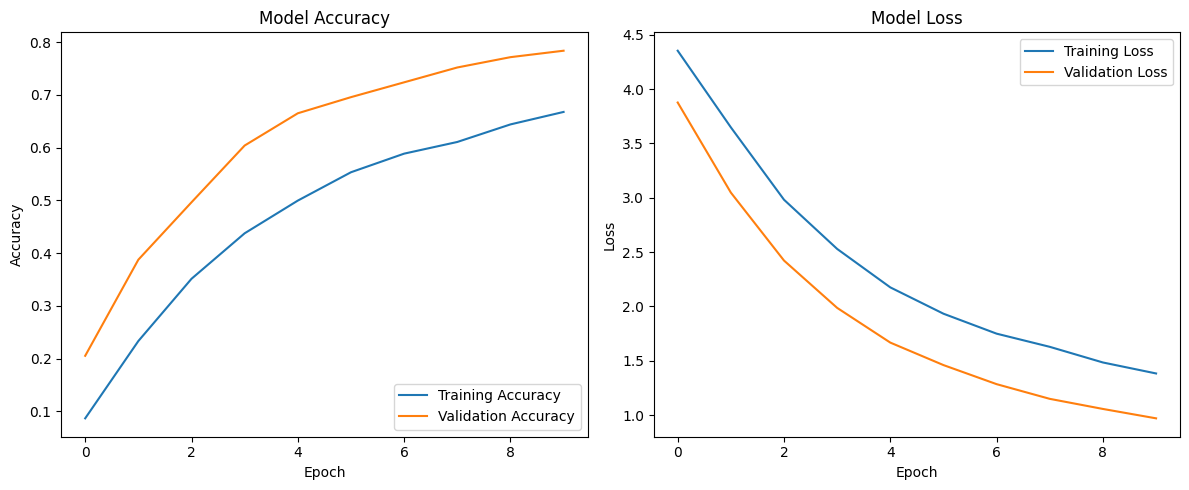

In [ ]:
import matplotlib.pyplot as plt
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot accuracy
ax1.plot(history.history['accuracy'], label='Training Accuracy')
ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_title('Model Accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend(loc='lower right')

# Plot loss
ax2.plot(history.history['loss'], label='Training Loss')
ax2.plot(history.history['val_loss'], label='Validation Loss')
ax2.set_title('Model Loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend(loc='upper right')

# Show the plots
plt.tight_layout()
plt.show()

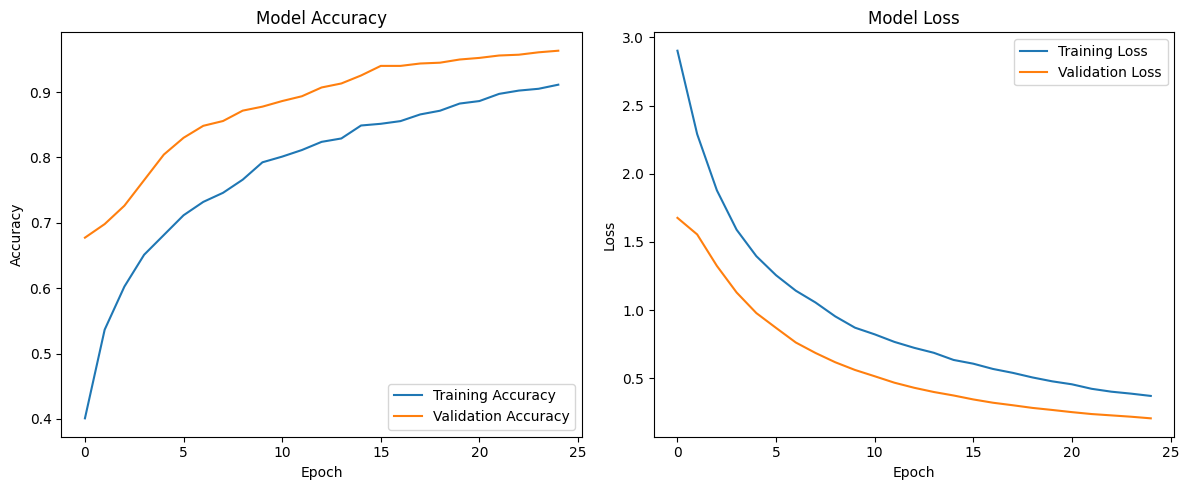

In [ ]:
import matplotlib.pyplot as plt
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot accuracy
ax1.plot(history_fine.history['accuracy'], label='Training Accuracy')
ax1.plot(history_fine.history['val_accuracy'], label='Validation Accuracy')
ax1.set_title('Model Accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend(loc='lower right')

# Plot loss
ax2.plot(history_fine.history['loss'], label='Training Loss')
ax2.plot(history_fine.history['val_loss'], label='Validation Loss')
ax2.set_title('Model Loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend(loc='upper right')

# Show the plots
plt.tight_layout()
plt.show()

May Augmentation is reson for this variation between Train nad val Acc

train wihh out **Augmetation** of data

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping


# Image dimensions and batch size
img_size = (224, 224)
batch_size = 32

# Data generators with preprocessing
train_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input,  # EfficientNet preprocessing
)

val_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input
)


train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)



# Load EfficientNet-B0 with pre-trained weights
base_model = EfficientNetB0(
    weights='imagenet',  # Load pre-trained weights
    include_top=False,   # Exclude the top classification layer
    input_shape=(224, 224, 3)
)

# Freeze the base model initially
base_model.trainable = False

# Build the model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.5),  # Add dropout for regularization
    Dense(102, activation='softmax')  # 5 classes for flowers
])



Found 6552 images belonging to 102 classes.
Found 818 images belonging to 102 classes.


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Unfreeze the base model for fine-tuning
base_model.trainable = True

# Recompile with a lower learning rate
model.compile(
    optimizer=Adam(learning_rate=1e-5),  # Lower learning rate for fine-tuning
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

checkpoint = ModelCheckpoint(
    '/content/drive/MyDrive/flower_data/EfficientNetB0_without_Augmentation.keras',             # Filepath to save the model
    monitor='val_accuracy',      # Metric to monitor (e.g., validation accuracy)
    save_best_only=True,         # Save only the best model
    mode='max',                  # Maximize the monitored metric (e.g., accuracy)
    verbose=1                    # Print a message when saving the model
)

# Fine-tune the model with out augmentation
history_fine_without_aug = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=25,
  callbacks=[EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),checkpoint]
)


Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


205/205 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step - accuracy: 0.0092 - loss: 4.6881
Epoch 1: val_accuracy improved from -inf to 0.03545, saving model to /content/drive/MyDrive/flower_data/EfficientNetB0_without_Augmentation.keras
205/205 ━━━━━━━━━━━━━━━━━━━━ 158s 443ms/step - accuracy: 0.0093 - loss: 4.6879 - val_accuracy: 0.0355 - val_loss: 4.5448
Epoch 2/25
205/205 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step - accuracy: 0.0341 - loss: 4.5362
Epoch 2: val_accuracy improved from 0.03545 to 0.09535, saving model to /content/drive/MyDrive/flower_data/EfficientNetB0_without_Augmentation.keras
205/205 ━━━━━━━━━━━━━━━━━━━━ 50s 233ms/step - accuracy: 0.0341 - loss: 4.5361 - val_accuracy: 0.0954 - val_loss: 4.3871
Epoch 3/25
205/205 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step - accuracy: 0.0708 - loss: 4.3794
Epoch 3: val_accuracy improved from 0.09535 to 0.18460, saving model to /content/drive/MyDrive/flower_data/EfficientNetB0_without_Augmentation.keras
205/205 ━━━━━━━━━━━━━━━━━━━━ 48s 226ms/step - accuracy: 0.0709

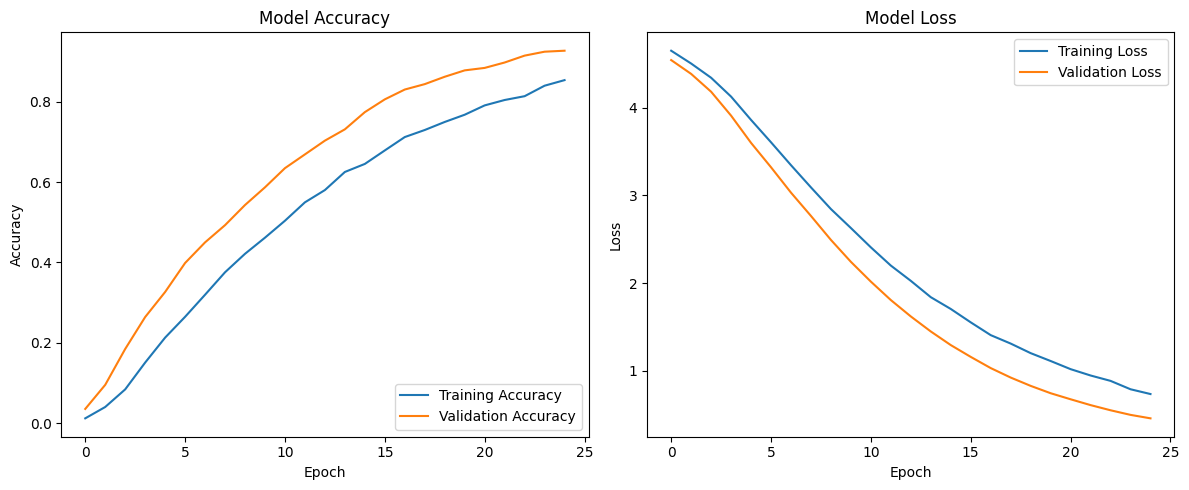

In [ ]:
import matplotlib.pyplot as plt
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot accuracy
ax1.plot(history_fine_without_aug.history['accuracy'], label='Training Accuracy')
ax1.plot(history_fine_without_aug.history['val_accuracy'], label='Validation Accuracy')
ax1.set_title('Model Accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend(loc='lower right')

# Plot loss
ax2.plot(history_fine_without_aug.history['loss'], label='Training Loss')
ax2.plot(history_fine_without_aug.history['val_loss'], label='Validation Loss')
ax2.set_title('Model Loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend(loc='upper right')

# Show the plots
plt.tight_layout()
plt.show()

**Thnaks for reading 😊**

\